# Upper Confidence Bound (UCB)

## Importing the libraries

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
#dataset is simulation, its like we know which ads would be clicked on, in reality we would not, and we would only show 1 add at a time and determine from that
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')




## Implementing UCB

In [107]:
import math
import random
from collections import namedtuple
from numpy.typing import ArrayLike
from typing import Optional

upper_confidence_bound_results = namedtuple('upper_confidence_bound_results', ['ads_selected','results_per_ad'])


def UCB(data: ArrayLike, beginning_upper_bound: float = 1E400, random_state: Optional[int] = 42)-> upper_confidence_bound_results:
    """
    Upper Confidence Bound (UCB) algorithm for multi-armed bandit problem.
    Args:
        data (ArrayLike[ArrayLike[np.float64]]): the dataset of ads
        random_state (int, optional): random state, in choosing which ad gets chosen by default. Defaults to 42.
        begining_upper_bound (float, optional): the median of confidence. Defaults to 1E400.

    Returns:
        namedtuple[list[int], dict[int: [int, int]]]: ads_selected, results_per_ad
        ads_selected (list[int]): list of ads selected
        results_per_ad (dict[int: [int, int]]): dictionary to store information about the ads, for values, first index is number of times selcted, second index is total reward
    """
   
    random.seed(random_state)

    NUM_ADS = data.shape[1]
    NUM_ROWS = data.shape[0]

    ads_selected = [] # list to store the ads selected

    # dictionary to store information about the ads, for values, first index is number of times selcted, second index is total reward
    ads_info = {i: [0,0] for i in range(NUM_ADS)}

    for n in range(1, NUM_ROWS + 1):
        max_upperbound_ad = random.randint(0, NUM_ADS - 1) # random ad to start with
        max_upperbound = 0

        for i in range(NUM_ADS):
            if ads_info[i][0] > 0: 
                average_reward = ads_info[i][1] / ads_info[i][0]
                delta_i = math.sqrt((3/2) * math.log(n) / ads_info[i][0])
                upper_bound = average_reward + delta_i
            else:
                upper_bound = beginning_upper_bound
            if upper_bound > max_upperbound:
                max_upperbound = upper_bound
                max_upperbound_ad = i

        ads_info[max_upperbound_ad][0] += 1
        ads_info[max_upperbound_ad][1] += data[n - 1, max_upperbound_ad] #n - 1 for the n - 1 row

        ads_selected.append(max_upperbound_ad)

    return upper_confidence_bound_results(ads_selected, ads_info)


In [108]:
results = UCB(dataset.values, random_state=42)
ads_selected = results.ads_selected

## Visualising the results

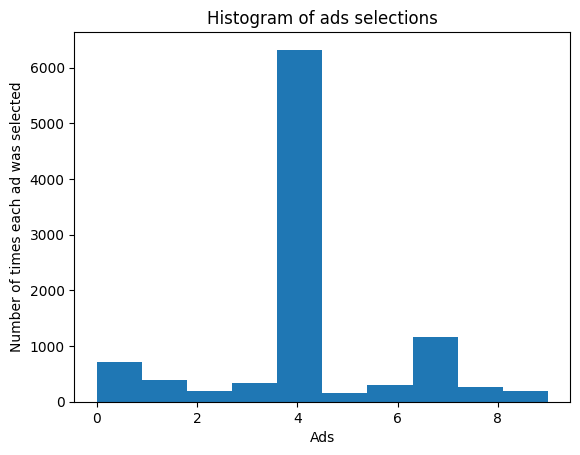

In [109]:
ads_selected = results.ads_selected
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

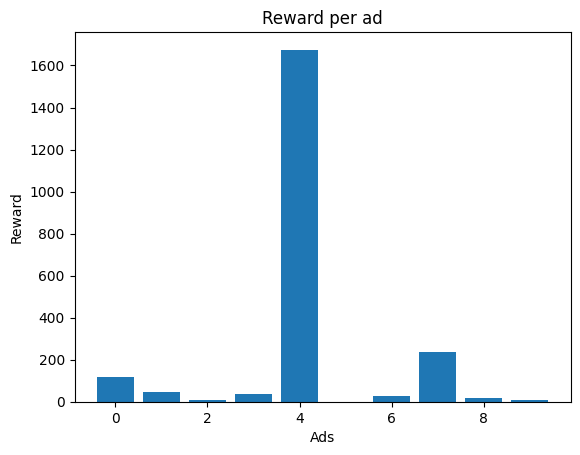

In [110]:
results_dict = results.results_per_ad
reward_per_add = list(map(lambda x: x[1], results_dict.values()))

plt.bar([i for i in range(len(reward_per_add))], reward_per_add)
plt.title('Reward per ad')
plt.xlabel('Ads')
plt.ylabel('Reward')
plt.show()